# I. Introduction to python

## 1. An Introductory example

In [1]:
#Exercice 1

def factorial(n):
    if n == 0:
        return 1
    a = 1
    for i in range(2,n+1):
        a *= i
    return a

factorial(10)

3628800

A function that generates one draw of the binomial random variable $Y \sim Bin(n,p).$<br>
If $\textbf{U}$ is uniform on $(0,1)$ and $p \in (0,1)$, then the expression $U < p$ evaluates to True with probability $p$.

In [2]:
#Exercice 2

from numpy.random import uniform
def binomial_rv(n,p):
    return sum([uniform(0,1) < p for _ in range(n)])
for _ in range(100):
    print(binomial_rv(100,0.3),end=",")

29,25,35,40,31,35,21,33,26,37,32,31,33,30,33,32,26,35,28,33,36,34,28,31,32,39,35,34,36,31,34,25,27,21,28,38,26,20,27,37,31,21,29,28,31,30,34,30,18,28,33,28,35,35,33,29,31,30,35,32,32,33,35,24,24,27,24,37,29,42,31,33,36,33,30,33,31,36,27,25,35,33,26,33,33,34,26,23,30,31,31,31,32,29,29,27,24,31,31,31,

$\textbf{An approximation of $\pi$ using the Monte-Carlo simulation}.$

The main idea is to create a disk inscribed in a square, then randomly generate a lot of points. The proportion
of dots that are within the disk represent it's area, and because we know the radius of the disk, we can approximate $\pi$.

We will be creating an array containing many couples of variables representing the coordinates of each point,
then we calculate whether the point is within the disk or not.
Each point $(x,y)$ is a bivariate uniform random variable on the unit square, $(x,y)\in (0,1)^2$, and the disk is defined by
$$\left \{(x,y)\in \mathbb{R}^2 ; \left(x-\dfrac{1}{2}\right)^2 + \left(y-\dfrac{1}{2}\right)^2 \leq \left(\dfrac{1}{2}\right)^2 \right \}$$
The more points we have the better the approximation.

In [3]:
#Exercice 3

import numpy as np

def monte_carlo_pi(trials):
    b_uniform = ((np.random.uniform(0,1), np.random.uniform(0,1)) for _ in range(trials))
    s = sum(((x-0.5)**2 + (y-0.5)**2 <= 0.25 for x,y in b_uniform))
    return 4*s/trials
monte_carlo_pi(100000)

3.1456

A program that prints one realization of the following random device:

>- Flip an unbiased coin 10 times.
>- If 3 consecutive heads occur one or more times within this sequence, pay one dollar.
>- If not, pay nothing.

In [4]:
#Exercice 4

def random_device(flips=10,p=0.5): #You can change the number of flips and the probability of getting heads.
    results = [uniform(0,1) < p for _ in range(flips)] #A flip is simulated using the uniform distribution.
    counter = 0
    for e in results:
        if e==True:
            counter += 1
        else:
            counter = 0
        if counter == 3: #Once you have 3 consecutive heads, pay one dollar
            return f"pay 1 dollar: {results}"
    return f"pay 0 dollar: {results}"
random_device()    

'pay 1 dollar: [False, True, True, True, False, False, False, True, False, False]'

Simulation and plot of the correlated time series:<br>
$$\displaystyle{x_{t+1}=\alpha x_{t}+\epsilon_{t+1}} \hspace{1cm} s.t. \hspace{1cm} x_{0}=0 \hspace{1cm} and \hspace{1cm} t=0,\cdots,T$$
The sequence of shocks $\left\{\epsilon_{t} \right\}$ is assumed to be i.i.d and standard normal.

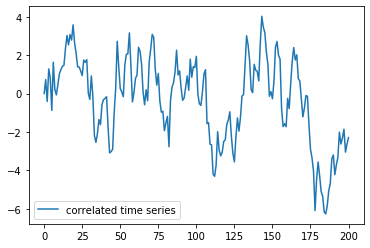

In [5]:
#Execrice 5

import matplotlib.pyplot as plt
%matplotlib inline

def c_time_series(x0=0,alpha=0.9,time_range=200):# initial values: alpha =0.9, x0=0 and T=200
    results = [x0]
    for i in range(time_range):
        results.append((lambda x:alpha*x + np.random.randn())(results[-1]))# randn() is equivalent to normal(0,1)
    return (range(time_range+1),results)# This way you can change the time range, x0 and alpha
plt.plot(*c_time_series(),label='correlated time series')# ploting  [x=0,...,T;y=x0,...,xT]
plt.legend()
plt.show()

A modulo randomness photo generated using the function in exercice 5

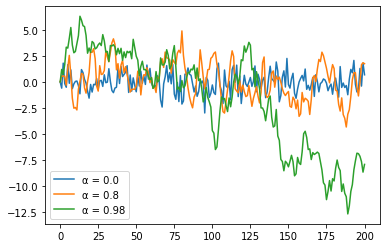

In [6]:
#Exercice 6

plt.plot(*c_time_series(alpha=0.0),label='α = 0.0')
plt.plot(*c_time_series(alpha=0.8),label='α = 0.8')
plt.plot(*c_time_series(alpha=0.98),label='α = 0.98')
plt.legend()
plt.show()

## 2. Python essentials

In [7]:
# Exercice 1

#part 1 (inner product of two lists)
from random import randrange

def inner_product(l1,l2):
    if len(l1) != len(l2):
        return "lists needs to be of same size"
    return sum(i*j for i,j in zip(l1,l2))
l1 = [randrange(0,20) for _ in range(10)]
l2 = [randrange(-10,10) for _ in range(10)]
print(inner_product(l1,l2))

#part 2 (count the number of even numbers within a sequence in one line)
print((lambda l:sum(i%2 == 0 for i in l))(range(10,110,3)))

#part 3 (given a pair ((a,b),(c,d),(e,f),...) count the number of pairs (x,y) such that both x and y are even)
l = ((2,4),(6,5),(8,8),(0,9),(13,12),(1,1),(4,160))
print((lambda l:sum([x%2 == 0 and y%2 == 0 for x,y in l]))(l))

-286
17
3


In [8]:
#Exercice 2

from math import sqrt
def p(x, coeff):
    return sum([element*(x)**i for i,element in enumerate(coeff)])

l = [1,1,1]
print(p(complex(-0.5,sqrt(3)/2),l))

(1.1102230246251565e-16+0j)


In [9]:
#Exercice 3

def count_capital_letters(s):
    return sum([e == e.upper() for e in s if e.isalpha()])

count_capital_letters('Hola AmIgo!')

3

In [10]:
#Exercice 4

def is_included(seq_a,seq_b):
    for i in seq_a:
        if i not in seq_b:
            return False
        continue
    return True
print(is_included('abcd','redsqazwxvcvb'))
print(is_included([1,6,9],[2,3,4,5,90,7,7,6,0,1]))

True
False


**Approximation of the value of $f(x)$ using linear interpolation**<br>

The following exercice calculates the value of a function $f$ at a certain point $x\in\left[a,b\right]\subset\mathbb{R}$.
The function "interval_partition" is used to divide the interval $\left[a,b\right]$ to $n$ equal sub-intervals, the function "closest_points" finds the closest points $\alpha,\beta \in \left[a,b\right]$ s.t $\alpha < x < \beta$.<br>
The main idea behind linear interpolation is to suppose that $f(x)$ is on the strait line joining $f(\alpha)$ and $f(\beta)$, then calculate $f(x)$ using the slope of the line: 
$$f(x) = \dfrac{f(\beta) - f(\alpha)}{\beta - \alpha}\left(x-\alpha\right) + f(\alpha)$$

In [11]:
#Exercice 5

def f(val):
    return val**2 + val/2 - 1

def interval_partition(interval,grid_size):
    step = (len(interval)-1)/grid_size
    result = [interval[0]]
    for _ in range(grid_size-1):
        result.append(result[-1]+step)
    return result

def closest_points(x,l):
    for e in l:
        if x>e:
            continue
        return (l[l.index(e)-1],e)
def linapprox(f,a,b,n,x):
    interval = interval_partition(range(a,b+1),n)
    α,β = closest_points(x,interval)
    return ((f(β) - f(α))/(β - α))*(x-α) + f(α)

print(f'Approximation error: {f(-3.666) - linapprox(f,-10,10,100,-3.666)}')

Approximation error: -0.008843999999999852


## 3. OOP: Building classes

The empirical cumulative distribution function corresponding to sample $\left\{ X_i\right\}_{i=1}^n$ is defined as:
$$F_n(x) = \displaystyle{\frac{1}{n}\sum_{i=1}^n\mathbb{1}_\left\{X_i\leq x\right\} }\hspace{1cm}(x\in\mathbb{R}) $$
$F_n(x)$ is the fraction of the sample that falls below $x$.<br>
The Glivenko–Cantelli Theorem states that, provided that the sample is IID, the ecdf $F_n$ converges to the true distribution function $F$.

In [27]:
#Exercice 1

from random import uniform

class ECDF:
    def __init__(self,observations):
        self.observations = observations
    
    def __call__(self,x):
        return sum([o <= x for o in self.observations])/len(self.observations)

F = ECDF([uniform(0,1) for i in range(10)])
print(F(0.5)) #This will be far from x
F.observations = [uniform(0,1) for i in range(1000)]
print(F(0.5)) #This should be close to x 

0.6
0.497


In [20]:
#Exercice 2

class Polynomial:
    def __init__(self,coefficients):
        self.coefficients = coefficients
    
    def __call__(self,x):
        return sum([c*x**i for i,c in enumerate(self.coefficients)])
    
    def derivative(self,x):
        self.coefficients = [c*i for i,c in enumerate(self.coefficients[1:],1)]
        return self(x)
p = Polynomial([1,3,3,1])
print(p(5))
print(p.derivative(5))

216
108
